In [1]:
from PIL import Image as img
import numpy as np
import cv2
import matplotlib.pyplot as plt
lena=img.open('lena.bmp')
lena_arr = np.asarray(lena)

In [344]:
def down(arr):
    m=len(arr)
    n=len(arr[0])
    res=[[0]*(m//8) for i in range(n//8)]
    for i in range(m//8):
        for j in range(n//8):
            res[i][j] = arr[8*i][8*j]
    return res
def up(arr):
    m=len(arr)
    n=len(arr[0])
    res=[[0]*(m*8) for i in range(n*8)]
    for i in range(m*8):
        for j in range(n*8):
            res[i][j] = arr[i//8][j//8]
    return res
def expan_zero(arr):
    m=len(arr)
    n=len(arr[0])
    res=res=[[0]*(n+2) for i in range(m+2)]
    for i in range(1,m+1):
        for j in range(1,n+1):
            res[i][j]=arr[i-1][j-1]
    return res
def h(b,c,d,e):
    if b!=c:
        return 's'
    else:
        if d==b and e==b:
            return 'r'
        else:
            return 'q'
def f(a1,a2,a3,a4):
    if a1=='r' and a2=='r'and a3=='r'and a4=='r':
        return 5
    tmp=0
    if a1=='q':
        tmp+=1
    if a2=='q':
        tmp+=1
    if a3=='q':
        tmp+=1
    if a4=='q':
        tmp+=1
    return tmp
def yokoi(arr):
    m=len(arr)
    n=len(arr[0])
    res=[[0]*(m) for i in range(n)]
    arr=expan_zero(arr)
    
    for i in range(m):
        for j in range(n):
            a1=h(arr[i+1][j+1],arr[i+1][j+2],arr[i][j+2],arr[i][j+1])
            a2=h(arr[i+1][j+1],arr[i][j+1],arr[i][j],arr[i+1][j])
            a3=h(arr[i+1][j+1],arr[i+1][j],arr[i+2][j],arr[i+2][j+1])
            a4=h(arr[i+1][j+1],arr[i+2][j+1],arr[i+2][j+2],arr[i+1][j+2])
            
            tmp=f(a1,a2,a3,a4)
            if tmp and arr[i+1][j+1]:
                res[i][j]=tmp
    return res

def pair(yokoi_arr):
    m=len(yokoi_arr)
    n=len(yokoi_arr[0])
    res=[[0]*(m) for i in range(n)]
    yokoi_arr=expan_zero(yokoi_arr)
    for i in range(m):
        for j in range(n):
            if yokoi_arr[i+1][j+1]==1:
                tmp=0
                for x,y in [(i,j+1),(i+1,j),(i+2,j+1),(i+1,j+2)]:
                    if yokoi_arr[x][y]==1:
                        tmp+=1
                if tmp>=1:
                    res[i][j]=1
    return res
def h2(b,c,d,e):
    if b==c and (b!=d or b!=e):
        return 1
    else:
        return 0
def f2(a1,a2,a3,a4,x):
    if a1+a2+a3+a4==1:
        return 0
    else:
        return x
def shink(origin,marked_arr):
    m=len(origin)
    n=len(origin[0])
    origin=expan_zero(origin)
    check=0
    for i in range(m):
        for j in range(n):
            if marked_arr[i][j]:
                a1=h2(origin[i+1][j+1],origin[i+1][j+2],origin[i][j+2],origin[i][j+1])
                a2=h2(origin[i+1][j+1],origin[i][j+1],origin[i][j],origin[i+1][j])
                a3=h2(origin[i+1][j+1],origin[i+1][j],origin[i+2][j],origin[i+2][j+1])
                a4=h2(origin[i+1][j+1],origin[i+2][j+1],origin[i+2][j+2],origin[i+1][j+2])

                tmp=f2(a1,a2,a3,a4,origin[i+1][j+1])
                if tmp!=origin[i+1][j+1]:
                    check=1
                    origin[i+1][j+1]=tmp
    copy=[[origin[i][j] for j in range(1,m+1)] for i in range(1,n+1)]
    return copy,check
            
    
    

In [182]:
down_arr=down((lena_arr//128)*255)

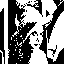

In [183]:
img.fromarray(np.array(down_arr,dtype='uint8'))

In [184]:
yokoi_arr=yokoi(down_arr)

In [185]:
marked_arr=pair(yokoi_arr)

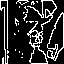

In [186]:
img.fromarray(np.array(marked_arr,dtype='uint8')*255)

In [187]:
res=shink(down_arr,marked_arr)

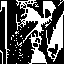

In [188]:
img.fromarray(np.array(res,dtype='uint8'))

In [222]:
res=(lena_arr//128)*255

In [339]:
yokoi_arr=yokoi(res)

In [340]:
marked_arr=pair(yokoi_arr)

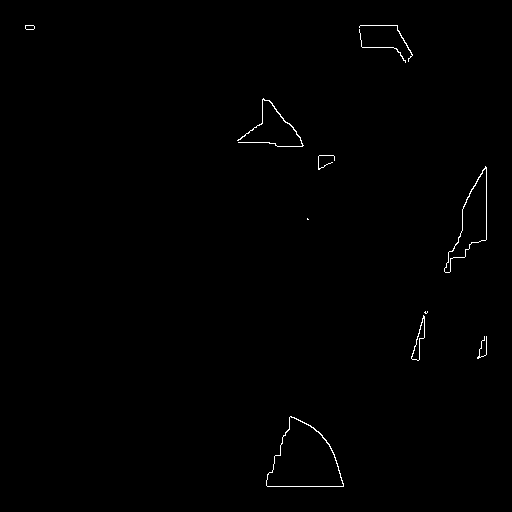

In [341]:
img.fromarray(np.array(marked_arr,dtype='uint8')*255)

In [342]:
res=shink(res,marked_arr)

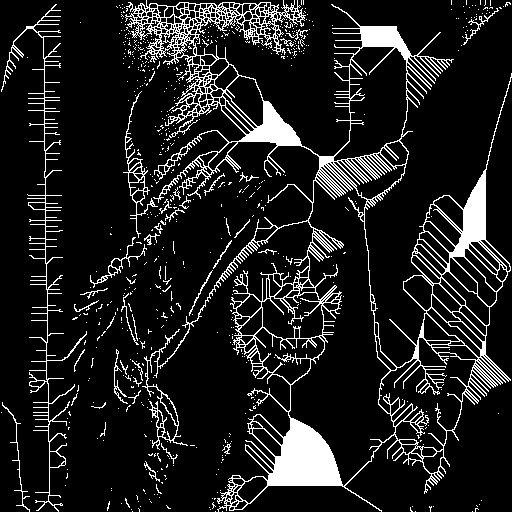

In [343]:
img.fromarray(np.array(res,dtype='uint8'))

In [220]:
res512=up(res)

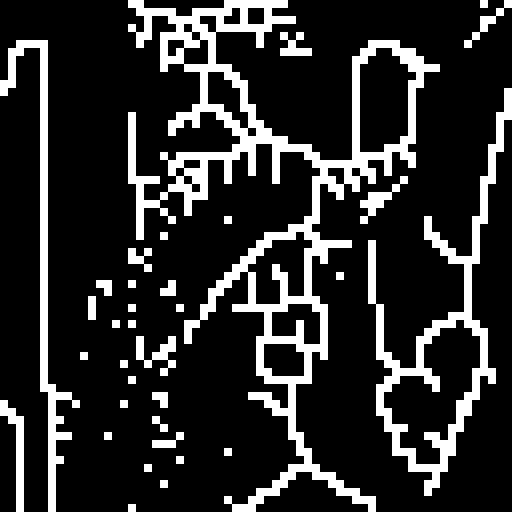

In [221]:
img.fromarray(np.array(res512,dtype='uint8'))

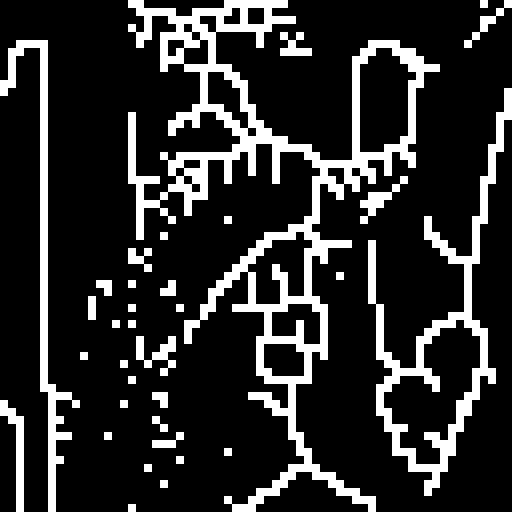

In [354]:
res=down((lena_arr//128)*255)
check=1
while check:
    yokoi_arr=yokoi(res)
    marked_arr=pair(yokoi_arr)
    res,check=shink(res,marked_arr)
res512=up(res)
img.fromarray(np.array(res512,dtype='uint8'))